In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

In [4]:
#Read NN and BMS data
n=0;function='leaky_ReLU' #tanh, leaky_ReLU
NPAR=10 #5, 10, 20

#Read NN data
train_size=60
file_model='NN_model_' + function + '_train_' +str(train_size)+ '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
dn=d[d['rep']==n]
dn.set_index('Unnamed: 0', inplace=True)
dn.index.name = None
dn=dn.reset_index(drop=True)

#Read BMS data
filename='../data/MSTraces/BMS_long_' + function + '_trace.' + str(n) + '_prior_'  + str(NPAR) + '.csv'
trace=pd.read_csv( filename, sep=';', header=None, names=['t', 'H', 'H1', 'expr', 'parvals', 'kk1', 'kk2','kk3'])
print(filename) 
#trace=pd.read_csv('../data/MSTraces/' + filename, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2','kk3'])
print(trace)

../data/MSTraces/BMS_long_leaky_ReLU_trace.0_prior_10.csv
           t           H                                                 H1  \
0          0   86.331356                                         sqrt(_a4_)   
1          1   86.331356                                         sqrt(_a4_)   
2          2  -33.008087                                            -(_a4_)   
3          3  -33.008087                                            -(_a4_)   
4          4  -31.321966                                          exp(_a4_)   
...      ...         ...                                                ...   
49995  49995 -163.187868  pow2(((fac(((pow2((_a6_ + (x1 + _a4_))) ** cos...   
49996  49996 -163.187868  pow2(((fac(((pow2((_a6_ + (x1 + _a4_))) ** cos...   
49997  49997 -163.187868  pow2(((fac(((pow2((_a6_ + (x1 + _a4_))) ** cos...   
49998  49998 -163.187868  pow2(((fac(((pow2((_a6_ + (x1 + _a4_))) ** cos...   
49999  49999 -163.187868  pow2(((fac(((pow2((_a6_ + (x1 + _a4_))) ** cos.

In [5]:
#Minimum description length
minrow = trace[trace.H == max(trace.H)].iloc[0]
minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)

print(minH)
print(minexpr)
print(minparvals)

86.3313561131902
{'d0': {'_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0}}
{'d0': 45.59079264689458}


In [6]:
VARS = ['x1',]
x = dn[[c for c in VARS]].copy()
y = dn.y


if NPAR==10:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')
elif NPAR==20:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np20.maxs200.2024-05-10 162907.551306.dat')
elif NPAR==5:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np5.2017-10-18 18:07:35.227360.dat')
elif NPAR==3:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np3.2017-10-18 18:07:35.262530.dat')

t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(NPAR)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=minexpr,
)

t.set_par_values(deepcopy(minparvals))

AttributeError: 'dict' object has no attribute 'atoms'

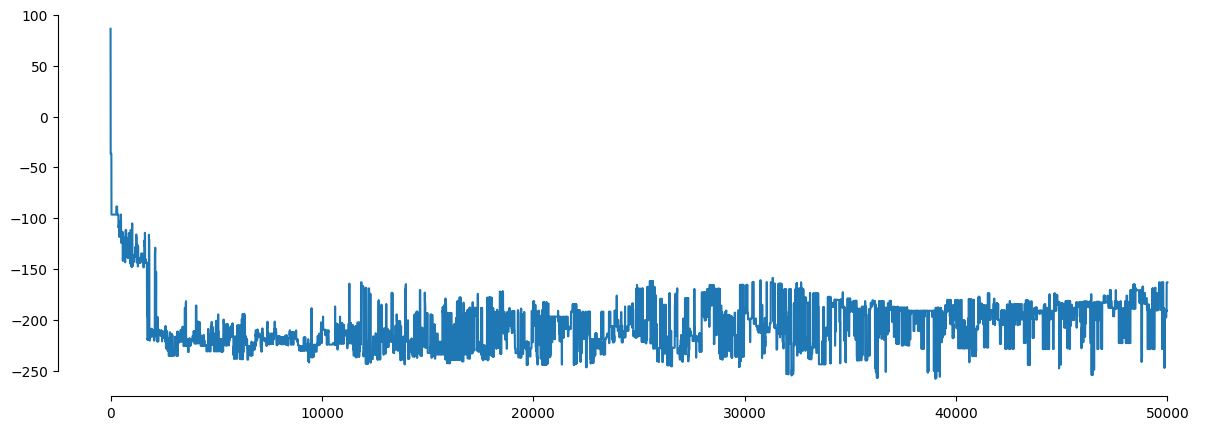

In [7]:
Nini = 00
plt.figure(figsize=(15, 5))

#Define figure size in cm                                                                           
Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                           

plt.plot(trace.t[trace.t > Nini], trace.H[trace.t > Nini])
#plt.plot(trace.t, trace.H)
sns.despine(trim=True)

Name_figure='MDL_' + function + '_' + str(n) + '_par_' + str(NPAR)
for ext in Extensions:
        plt.savefig('../results/' + Name_figure +ext,dpi=300)

 
plt.show()

      x1         y  rep    ymodel      ybms
0  -1.95  0.999983  5.0  0.999960  0.780005
1  -1.90  0.999943  5.0  0.999895  0.780005
2  -1.85  0.999879  5.0  0.999816  0.780005
3  -1.80  0.999788  5.0  0.999721  0.780005
4  -1.75  0.999670  5.0  0.999607  0.780005
..   ...       ...  ...       ...       ...
75  1.80  0.118276  5.0  0.337573  0.780005
76  1.85  0.106747  5.0  0.337976  0.780005
77  1.90  0.096164  5.0  0.338330  0.780005
78  1.95  0.086501  5.0  0.338639  0.780005
79  2.00  0.077715  5.0  0.338912  0.780005

[80 rows x 5 columns]


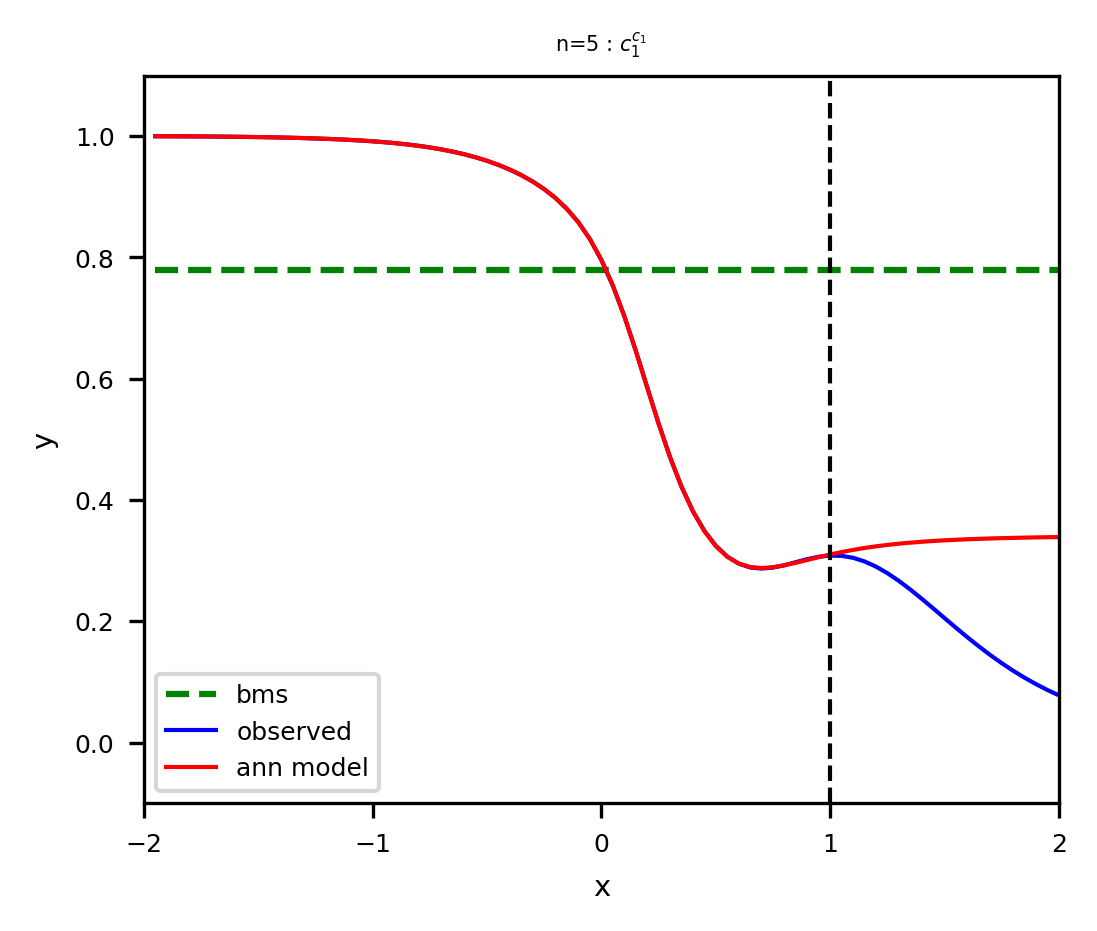

In [7]:
#Plot
train_border=dn.loc[train_size-1]['x1']

dplot = deepcopy(dn)
dplot['ybms'] = t.predict(x)
print(dplot)

#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 10*cm; height=8*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          


fig=figure(figsize=(width,height), dpi=300)                                                        

plt.plot(dplot.x1, dplot.ybms, color='green', linestyle='--',label='bms')
plt.plot(dn['x1'], dn['y'],linewidth=line_w, color='blue',label='observed')                                                      
plt.plot(dn['x1'], dn['ymodel'],linewidth=line_w, color='red', label='ann model')   

plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

#plt.title('$%s$' % t.latex(),fontsize=size_title)
plt.title('n=%d : $%s$' % (n, t.latex()),fontsize=size_title)
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.legend(loc='best', fontsize=size_ticks)

plt.xlim(-2,2);plt.ylim(-0.1,1.1)                                               

Name_figure='Prediction_' + function + '_' + str(n) + '_par_' + str(NPAR)
for ext in Extensions:
        plt.savefig('../results/' + Name_figure +ext,dpi=300)

plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
d = pd.read_csv('../data/NN_predictions_tanh_train_60_NREP_10_data.csv', index_col=0)
d = d[(d.rep == 5) ][:60]
d

,x1,y,rep,ymodel
400,-1.950000e+00,0.999983,5.0,1.000115
401,-1.900000e+00,0.999943,5.0,0.999979
402,-1.850000e+00,0.999879,5.0,0.999845
403,-1.800000e+00,0.999788,5.0,0.999709
404,-1.750000e+00,0.999670,5.0,0.999568
405,-1.700000e+00,0.999523,5.0,0.999417
406,-1.650000e+00,0.999344,5.0,0.999250
407,-1.600000e+00,0.999130,5.0,0.999062
408,-1.550000e+00,0.998879,5.0,0.998845
409,-1.500000e+00,0.998587,5.0,0.998591


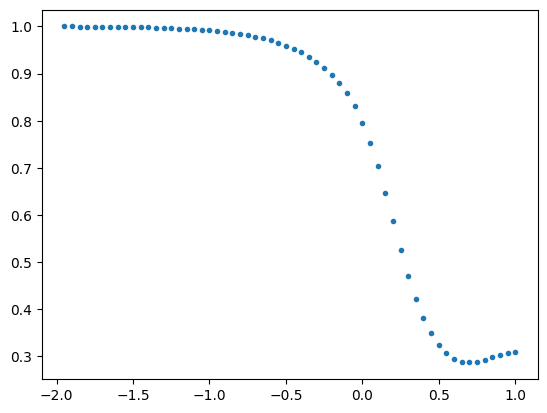

In [12]:
plt.plot(d.x1, d.y, '.')

In [13]:
# Read the hyperparameters for the prior
prior_par = read_prior_par('./machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')

# Set the temperatures for the parallel tempering
Ts = [1] + [1.04**k for k in range(1, 20)]

# Instantiate a Tree from the desired string
X, y = d[['x1']], d['y']
XLABS = list(X.columns)

# REPEAT NREP TIMES
NSTEP = 5000

# Initialize the parallel machine scientist
pms = Parallel(
    Ts,
    variables=XLABS,
    parameters=['a%d' % i for i in range(8)],
    x=X, y=y,
    prior_par=prior_par,
)

description_lengths, mdl, mdl_model = [], np.inf, None


  0%|                                                 | 0/5000 [00:00<?, ?it/s]

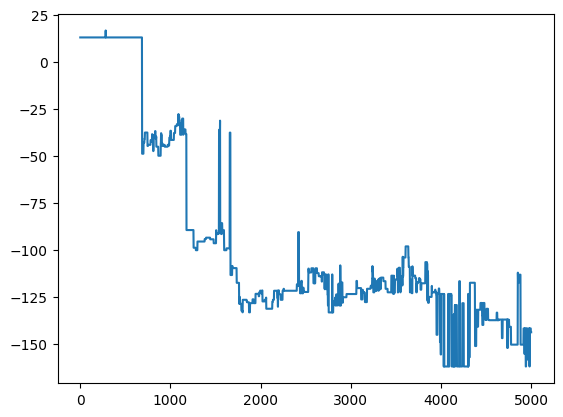

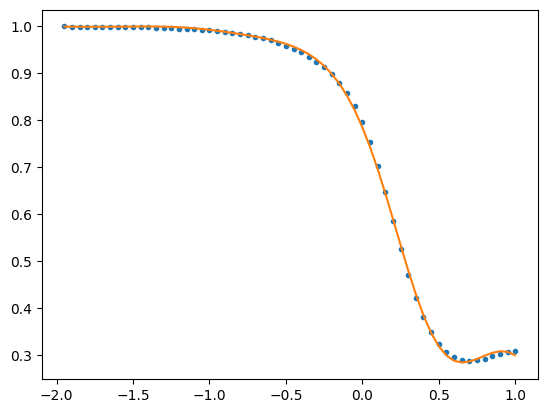

 20%|███████▊                               | 999/5000 [01:03<03:45, 17.75it/s]

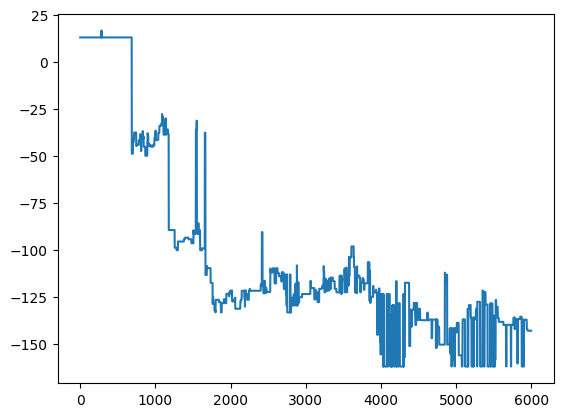

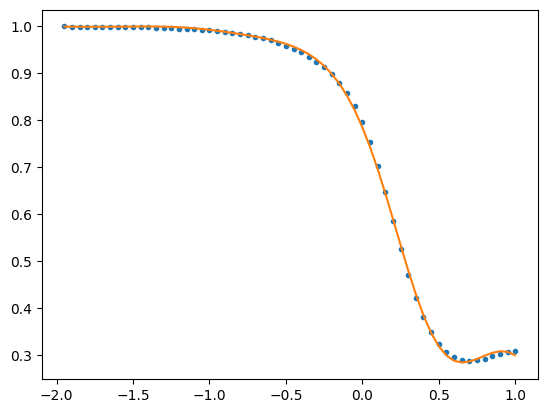

 40%|███████████████▏                      | 2000/5000 [02:15<04:11, 11.91it/s]

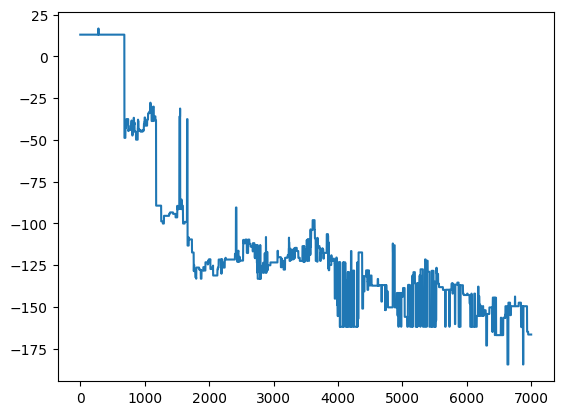

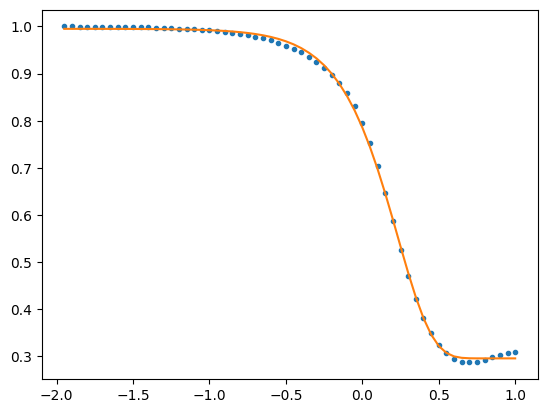

 60%|██████████████████████▊               | 3000/5000 [08:24<21:35,  1.54it/s]

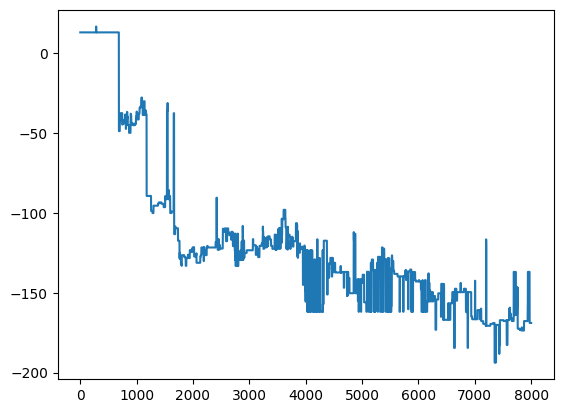

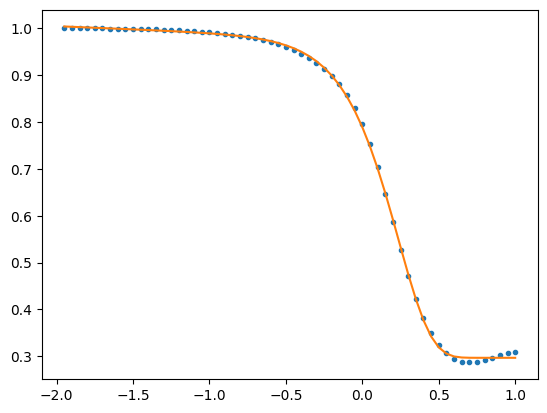

 66%|████████████████████████▉             | 3289/5000 [10:50<12:35,  2.26it/s]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x746e50ebfee0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
 66%|████████████████████████▉             | 3289/5000 [25:21<13:11,  2.16it/s]

KeyboardInterrupt



In [15]:

# MCMC
for i in tqdm(range(NSTEP)):
    # MCMC update
    pms.mcmc_step() # MCMC step within each T
    pms.tree_swap() # Attempt to swap two randomly selected consecutive temps
    # Add the description length to the trace
    description_lengths.append(pms.t1.E)

    # Check if this is the MDL expression so far
    if pms.t1.E < mdl:
        mdl, mdl_model = pms.t1.E, deepcopy(pms.t1)

    if i % 1000 == 0:
        plt.plot(description_lengths)
        plt.show()

        plt.plot(d.x1, d.y, '.')
        plt.plot(X.x1, mdl_model.predict(X))
        plt.show()
